In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, clear_output
import scipy.optimize as spo
import iminuit
import uproot
import json
import multiprocessing as mp
import time
from scipy.optimize import curve_fit
import simulation_utility as su

In [2]:
def process_simulation(angle=0,nfile=2001):
    file_number_range = range(1,nfile)
    #main_path = f'/home/pieramico/AIUTO/provo/'
    main_path = f'/home/pieramico/ABALONELYSO/ABALONE_25kV/results/'
    print('file in',main_path)
    save_path = f'ABALONE/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    pe1_ang0 = su.track_and_readout(1,angle,file_number_range,main_path,save_path)

In [10]:
process_simulation(angle=0)

file in /home/pieramico/ABALONELYSO/ABALONE_25kV/results1/
Initializing 1 pe, at angle 0
counting electrons...
time to count electrons 1.44
straight event 5840
non returning event 3641
returning electron event 387
never event 132
file in /home/pieramico/ABALONELYSO/ABALONE_25kV/results1/
Initializing 1 pe, at angle 15
counting electrons...
time to count electrons 1.43
straight event 5887
non returning event 3562
returning electron event 418
never event 133
file in /home/pieramico/ABALONELYSO/ABALONE_25kV/results1/
Initializing 1 pe, at angle 30
counting electrons...
time to count electrons 1.43
straight event 5705
non returning event 3740
returning electron event 413
never event 142
file in /home/pieramico/ABALONELYSO/ABALONE_25kV/results1/
Initializing 1 pe, at angle 45
counting electrons...
time to count electrons 1.42
straight event 5454
non returning event 3980
returning electron event 389
never event 177
file in /home/pieramico/ABALONELYSO/ABALONE_25kV/results1/
Initializing 1 pe,

FileNotFoundError: [Errno 2] No such file or directory: '/home/pieramico/ABALONELYSO/ABALONE_25kV/results1/SiPM/SiPM_readout_1_85_run_1.txt'

In [19]:
def simulation_spectra(angle=0,maxb=3500):
    save_path = f'ABALONE_{angle}angle/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    popt = su.plot_spectra(save_path,xlim = (0,maxb), bin_number = 120,angle=angle)
    mu = popt[1]
    return mu
def simulation_stat(angle=0):
    save_path = f'ABALONE_{angle}angle/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    stat = su.e_stat_bootstrap(save_path,angle=angle)
    return stat

Results with 1 PE at angle 0 deg


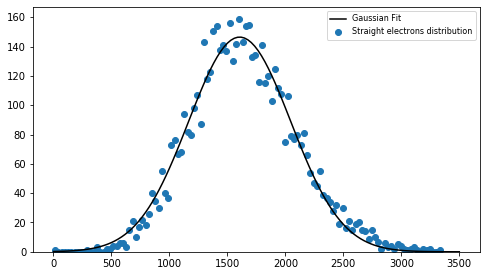

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.58
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.01


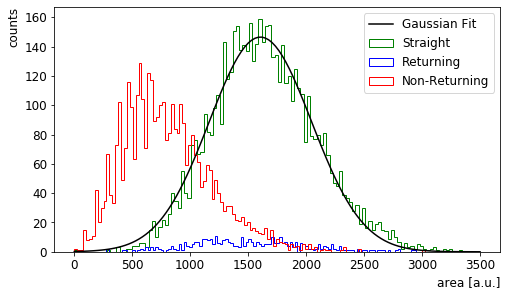

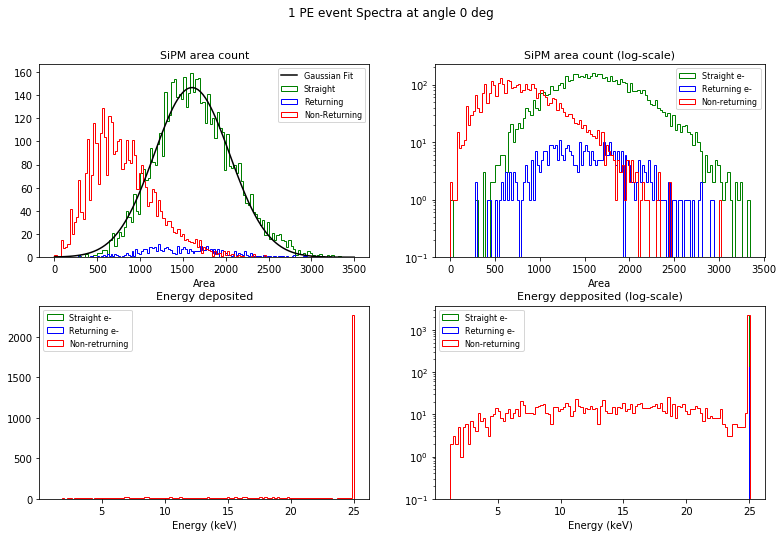

Results with 1 PE at angle 15 deg


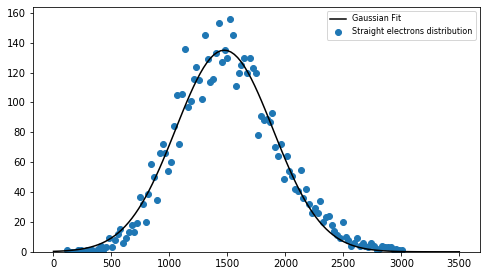

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.59
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.01


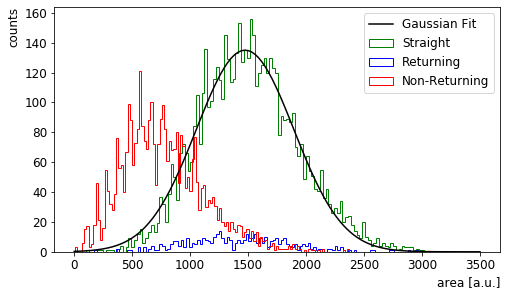

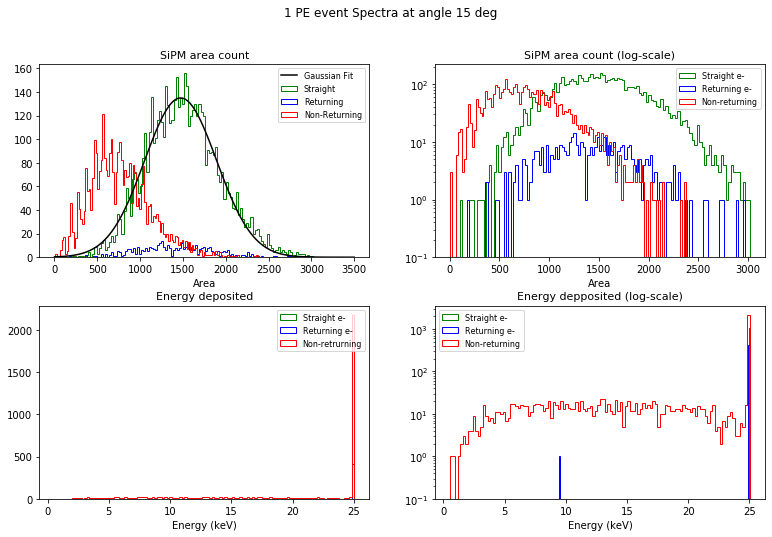

Results with 1 PE at angle 30 deg


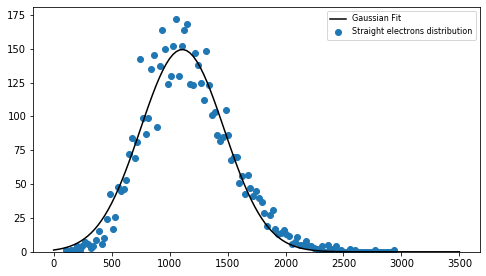

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.37
Portion of back-scattered electrons (returning+non-returning): 0.42
Portion of undetected electrons: 0.01


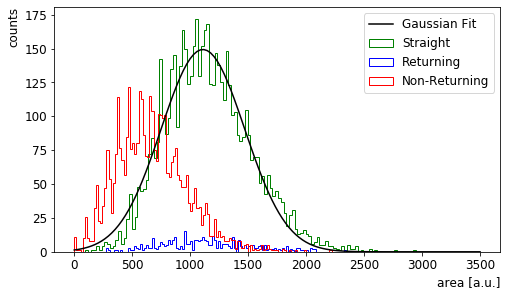

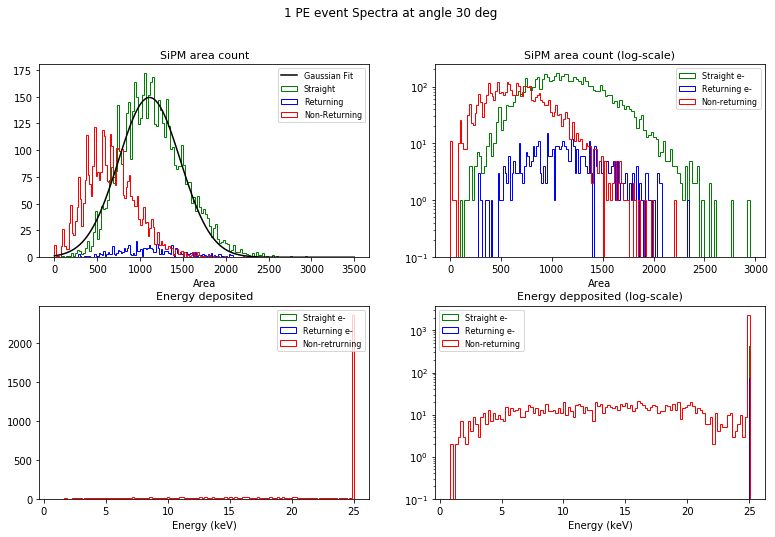

Results with 1 PE at angle 45 deg


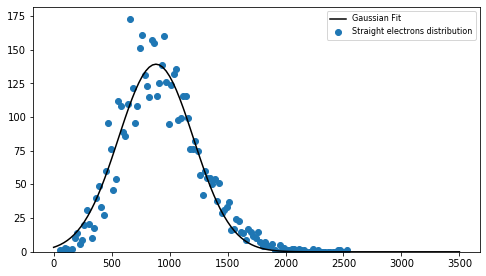

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.55
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.40
Portion of back-scattered electrons (returning+non-returning): 0.44
Portion of undetected electrons: 0.02


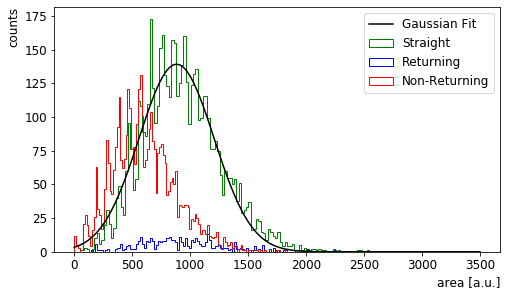

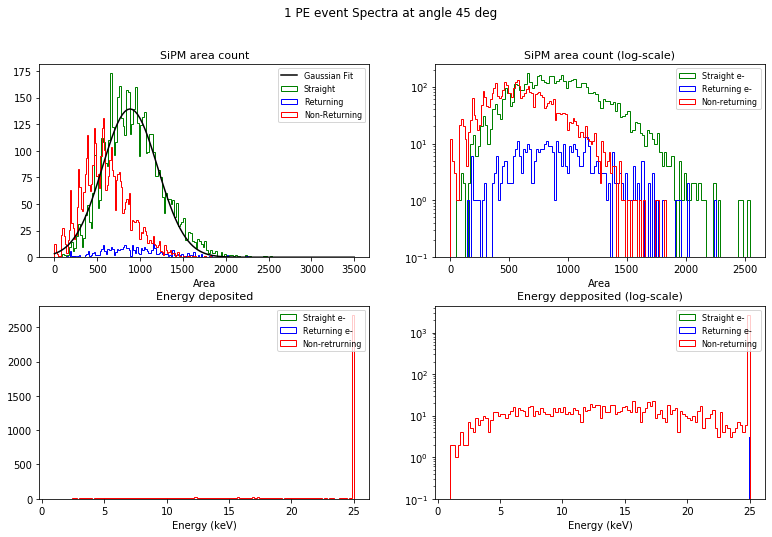

Results with 1 PE at angle 60 deg


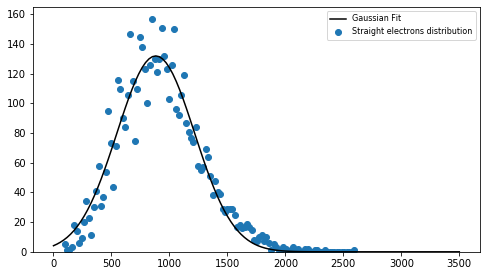

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.53
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.40
Portion of back-scattered electrons (returning+non-returning): 0.45
Portion of undetected electrons: 0.02


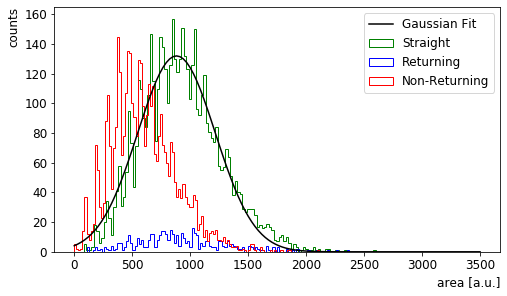

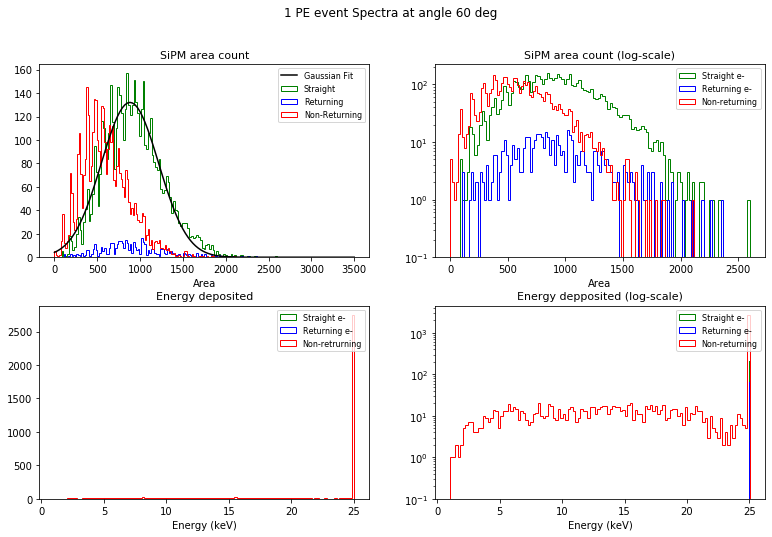

Results with 1 PE at angle 75 deg


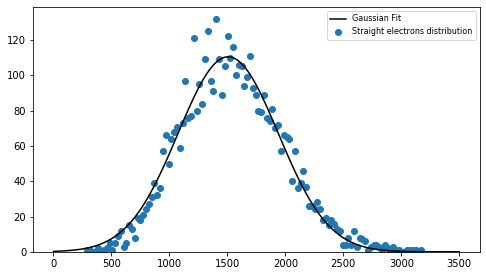

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.49
Portion of returning back-scattered electrons: 0.05
Portion of non-returning back-scattered electrons: 0.42
Portion of back-scattered electrons (returning+non-returning): 0.47
Portion of undetected electrons: 0.03


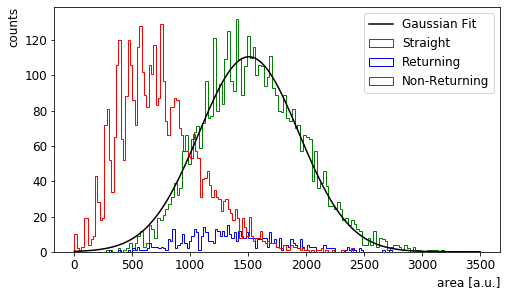

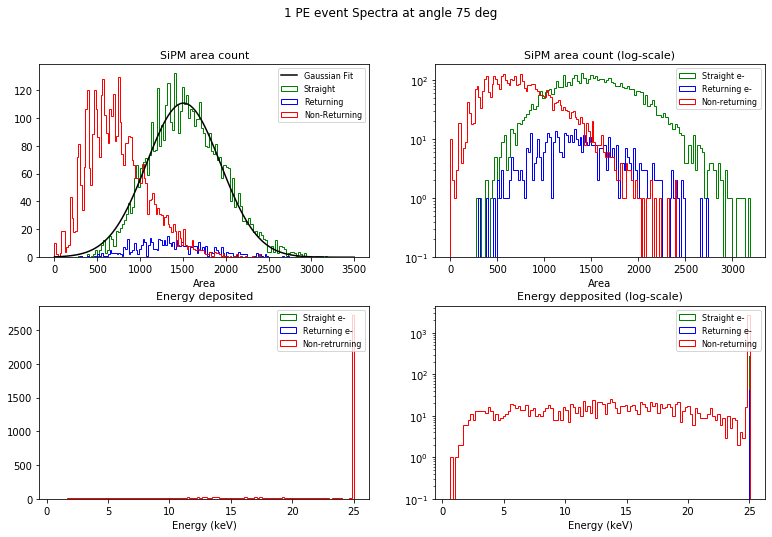

Results with 1 PE at angle 83 deg


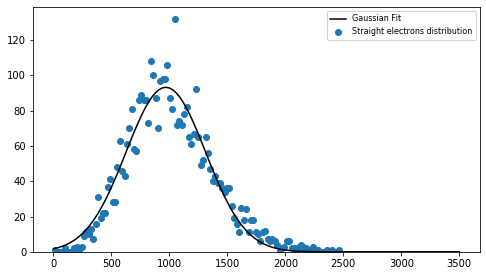

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.39
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.39
Portion of undetected electrons: 0.22


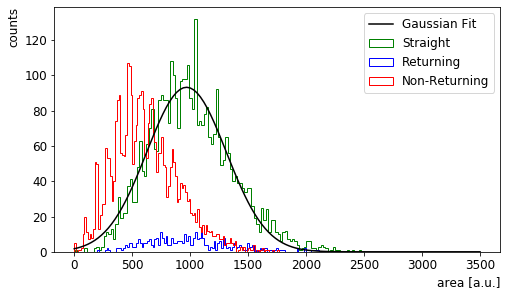

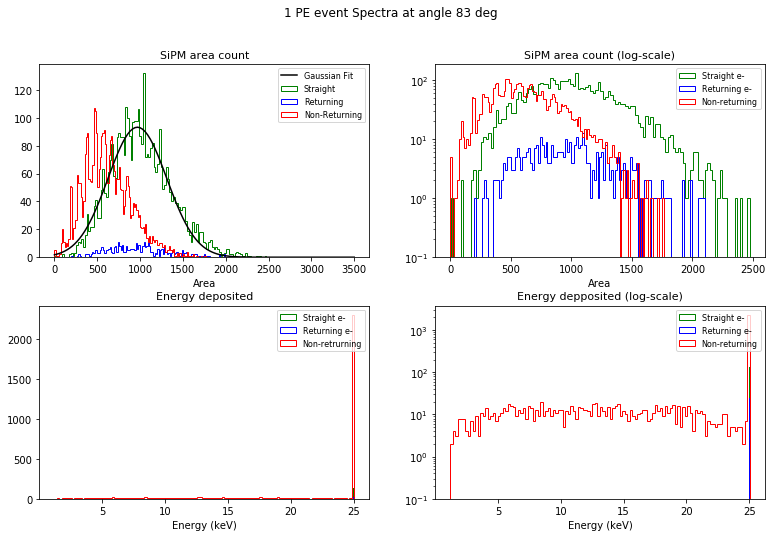

In [20]:
angles = [0,15,30,45,60,75,83]
#mm = [3500,3500,3000,3000,2500,2500,2000]
mus = []
for i,angle in enumerate(angles[:]):
    mu = simulation_spectra(angle=angle)
    mus.append(mu)

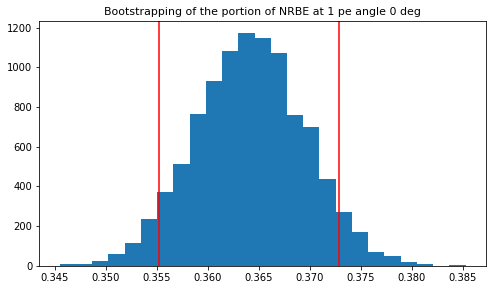

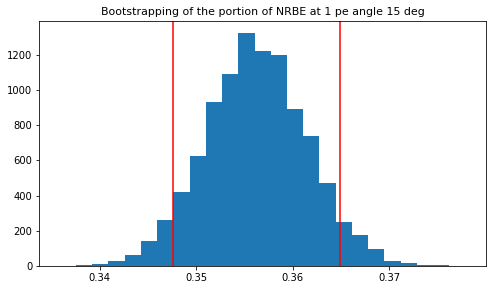

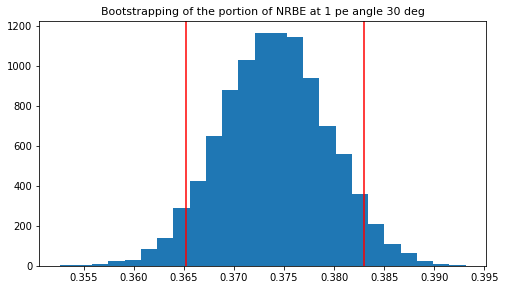

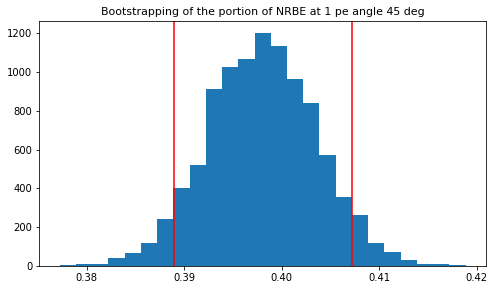

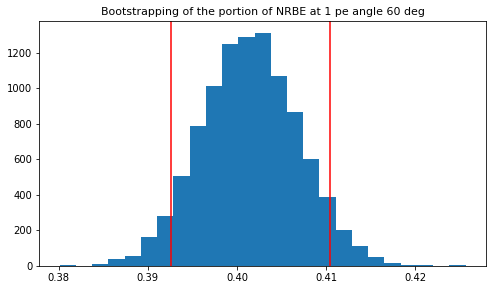

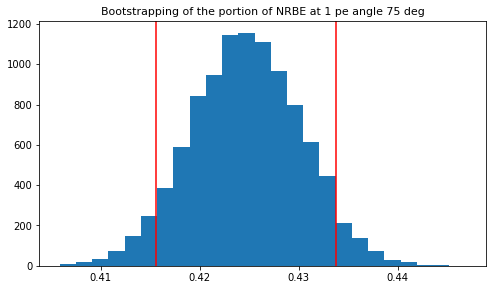

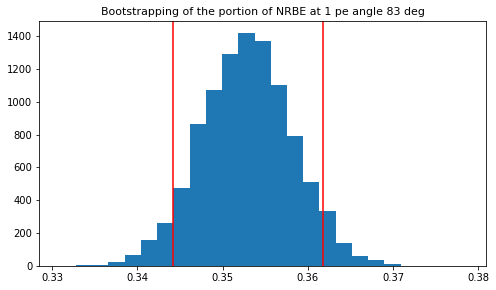

In [21]:
#stat_1_0 = su.e_stat_bootstrap(PE=1,angle=0)
#stat_1_15 = su.e_stat_bootstrap(PE=1,angle=15)
#stat_1_30 = su.e_stat_bootstrap(PE=1,angle=30)
#stat_1_45 = su.e_stat_bootstrap(PE=1,angle=45)
#stat_1_60 = su.e_stat_bootstrap(PE=1,angle=60)
#stat_1_75 = su.e_stat_bootstrap(PE=1,angle=75)
#stat_1_85 = su.e_stat_bootstrap(PE=1,angle=85)
stats = []
for i,angle in enumerate(angles[:]):
    stat = simulation_stat(angle=angle)
    stats.append(stat)

(0, 80)

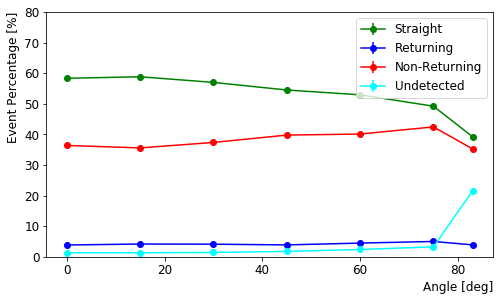

In [23]:
#stat_set = [stat_1_0,stat_1_15,stat_1_30,stat_1_45,stat_1_60,stat_1_75,stat_1_85]
SE = [i[0][0] for i in stats]
SE_var = [i[0][3] for i in stats]
RE = [i[1][0] for i in stats]
RE_var = [i[1][3] for i in stats]
NRBE = [i[2][0] for i in stats]
NRBE_var = [i[2][3] for i in stats]
NE = [i[3][0] for i in stats]
NE_var = [i[3][3] for i in stats]
SE = np.array(SE)*100
SE_var = np.array(SE_var)*100
RE = np.array(RE)*100
RE_var = np.array(RE_var)*100
NE = np.array(NE)*100
NE_var = np.array(NE_var)*100
NRBE = np.array(NRBE)*100
NRBE_var = np.array(NRBE_var)*100
#angle = [0,15,30,45,60,75,85]
plt.figure(figsize=(8,4.5))
plt.errorbar(angles,SE,yerr=SE_var,marker='o',label="Straight",color="Green")
plt.errorbar(angles,RE,yerr=RE_var,marker='o',label="Returning",color="Blue")
plt.errorbar(angles,NRBE,yerr=NRBE_var,marker='o',label="Non-Returning",color="Red")
plt.errorbar(angles,NE,yerr=NE_var,marker='o',label="Undetected",color="cyan")

#plt.plot(angle,NRBE*100,marker='o',color="Red")
#plt.plot(angle,SE*100,marker='o',color="Green")
#plt.plot(angle,RE*100,marker='o',color="Blue")
#plt.plot(angle,NE*100,marker='o',color="cyan")

#plt.title("Portion of Non-returning back scattered electrons")
plt.xlabel('Angle [deg]',ha='right',x=1,fontsize=12)
plt.ylabel('Event Percentage [%]',ha='right',y=1,fontsize=12)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(fontsize=12)
plt.savefig("events_vs_angle",dpi=800)
plt.ylim(0,80)

#plt.figure(figsize=(8,4.5))
#eff = np.array([stat_1_0[3][0],stat_1_15[3][0],stat_1_30[3][0],stat_1_45[3][0],stat_1_60[3][0],stat_1_75[3][0],stat_1_85[3][0]])
#plt.plot(np.array([0,15,30,45,60,75,85]),(1-eff)*100,marker='o')
#plt.title("Portion of Non-returning back scattered electrons")
#plt.xlabel('Angle [deg]',ha='right',x=1)
#plt.ylabel('Efficiency [%]',ha='right',y=1)
#plt.ylim(0.,1.1)
#plt.savefig("efficiency_vs_angle.png",dpi=800)
#plt.show()